# Mini Project 1 – Exploratory Data Analysis (EDA)

## Introduction

This dataset contains customer analytics data used to analyze customer behavior, purchasing patterns, and related attributes.

Each row in this dataset represents a single customer record. The columns contain various features describing the customer, such as demographic details, transaction-related information, and possibly behavioral metrics.

The objective of this notebook is to explore the dataset by understanding:
- The structure of the data
- The data types of each column
- The presence of missing values
- Basic statistical summaries

This initial exploration helps in preparing the data for further preprocessing and analysis.

In [5]:
import pandas as pd
df = pd.read_csv("customer_analytics (1).csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


In [6]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

In [7]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

CustomerID              0.000000
Age                     0.000000
Gender                  0.000000
City                    0.000000
Education               4.705882
MaritalStatus           0.000000
AnnualIncome            4.705882
SpendingScore           0.000000
YearsEmployed           0.000000
PurchaseFrequency       0.000000
OnlineVisitsPerMonth    0.000000
ReturnedItems           0.000000
PreferredDevice         0.000000
LastPurchaseAmount      0.000000
dtype: float64

In [8]:
df['AnnualIncome'] = df['AnnualIncome'].fillna(df['AnnualIncome'].median())

In [9]:
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

In [10]:
df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(5)

In [12]:
df = df.drop_duplicates()

In [13]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

## Data Cleaning Decisions

### 1. Missing Values

After checking missing values using `df.isnull().sum()`, I found:

- The **'Education'** column had 12 missing values.
- The **'AnnualIncome'** column had 12 missing values.
- All other columns had no missing values.

Since the percentage of missing data was very small compared to the total dataset size:

- I filled missing values in **'Education'** using the **mode** (most frequent category) because it is a categorical variable.
- I filled missing values in **'AnnualIncome'** using the **median** because income data can be skewed and the median is less affected by outliers.
- No columns were dropped because the amount of missing data was minimal.

---

### 2. Duplicate Records

I checked for duplicate rows using `df.duplicated().sum()`.

- The dataset contained **0 duplicate rows**.
- Since no duplicates were found, no rows were removed.

---

### Final Outcome

After handling missing values and verifying duplicate records, the dataset is now clean, complete, and ready for further analysis.

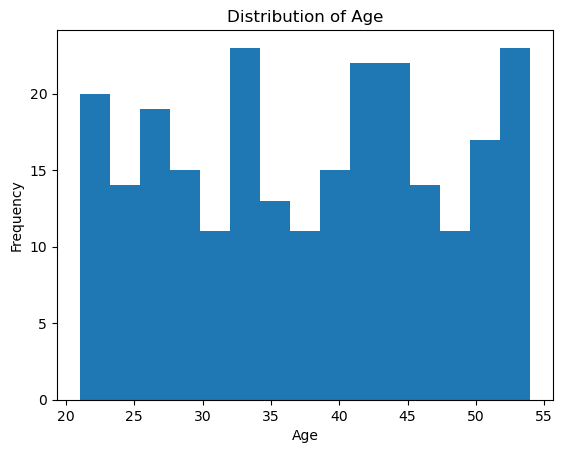

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Age'], bins=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

The histogram shows the distribution of customer ages. Most customers fall within the middle-age group, indicating that the business primarily serves working-age individuals rather than very young or elderly customers.

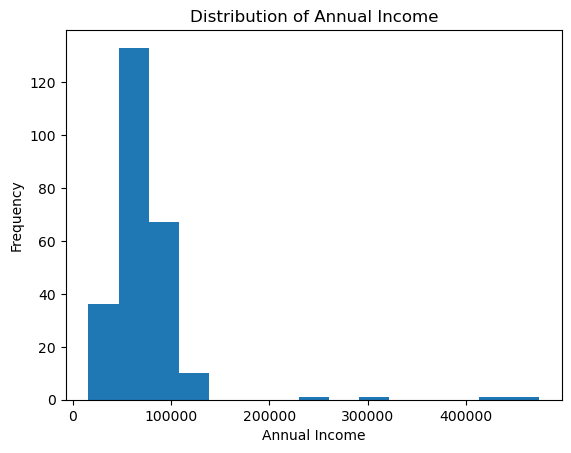

In [15]:
plt.figure()
plt.hist(df['AnnualIncome'], bins=15)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()

The income distribution shows how customer earnings are spread across different ranges. If the distribution is slightly skewed, it suggests the presence of higher-income customers influencing the overall spread.

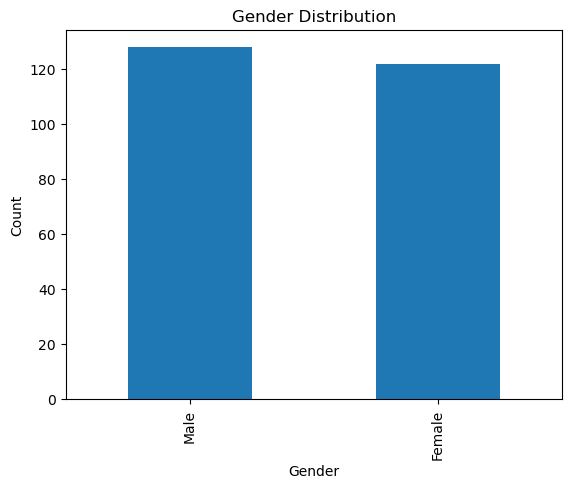

In [16]:
plt.figure()
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

The bar chart shows the number of male and female customers. This helps understand whether the customer base is balanced or dominated by one gender.

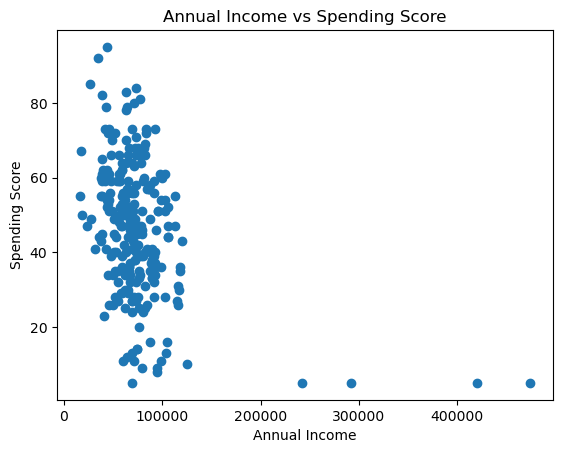

In [17]:
plt.figure()
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

The scatter plot shows the relationship between annual income and spending score. If there is no strong linear pattern, it suggests that higher income does not necessarily mean higher spending behavior.

<Figure size 640x480 with 0 Axes>

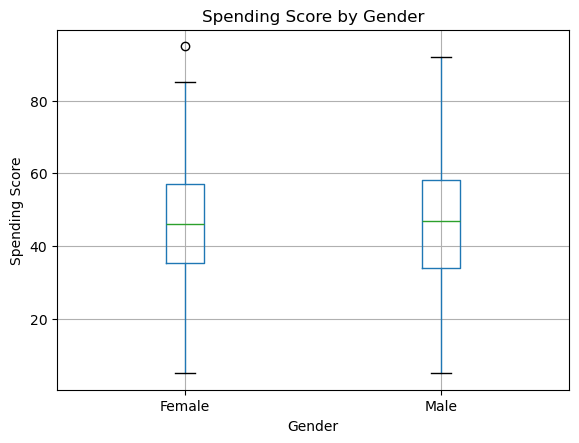

In [18]:
plt.figure()
df.boxplot(column='SpendingScore', by='Gender')
plt.title('Spending Score by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

The boxplot compares spending behavior between genders. Differences in median and spread indicate whether one gender tends to spend more or has more variability in spending.

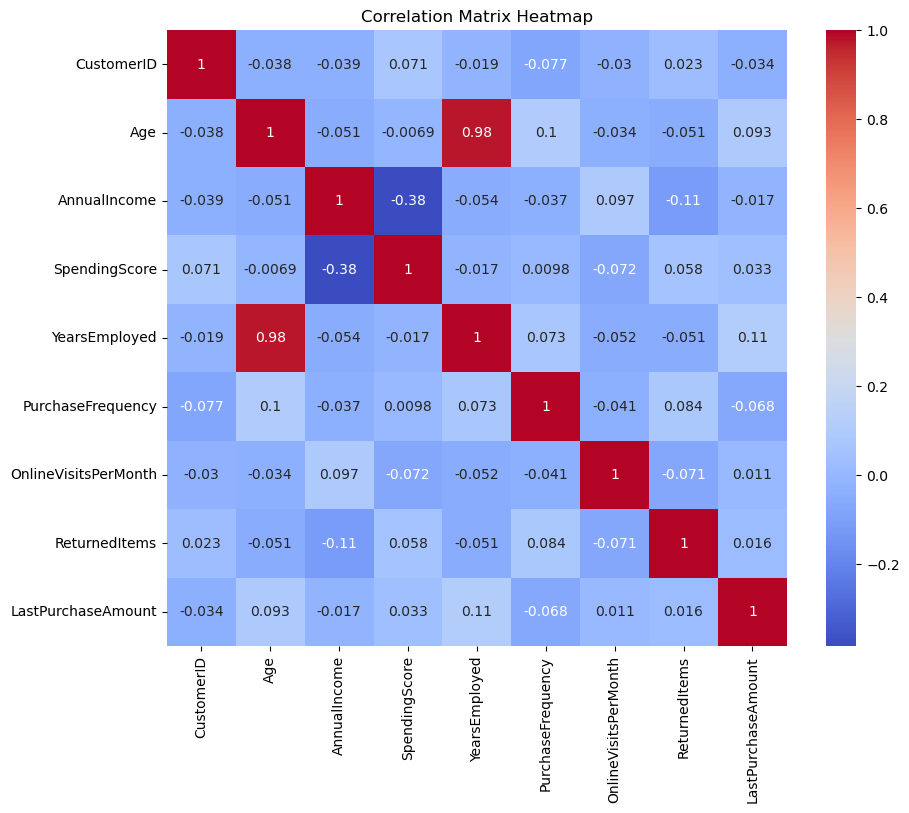

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Create correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation heatmap visualizes relationships between all numerical variables in the dataset.

Strong positive correlations (values close to +1) indicate that two variables increase together.
Strong negative correlations (values close to -1) indicate an inverse relationship.
Values close to 0 indicate weak or no linear relationship.

This visualization helps identify which variables are strongly associated and may influence customer behavior.

# Executive Summary

This exploratory data analysis was conducted to understand customer demographics, income patterns, and spending behavior.

## Key Insight 1: Spending Behavior Patterns
The analysis shows that spending behavior is not strictly dependent on income level. Customers with moderate income levels also demonstrate high spending scores, suggesting that purchasing behavior is influenced by factors beyond income.

## Key Insight 2: Demographic Influence
Age distribution indicates that the majority of customers belong to the working-age population. Certain age groups appear to have distinct spending tendencies, highlighting potential customer segmentation opportunities.

## Key Insight 3: Income and Purchase Activity
A moderate relationship between annual income and last purchase amount suggests that higher-income customers may contribute more per transaction, though frequency of purchase may vary.

## Overall Conclusion
The dataset is clean and well-structured, with minimal missing values and no duplicate records. The analysis reveals meaningful relationships between demographic and spending variables, providing a strong foundation for customer segmentation, targeted marketing, and predictive modeling.